## 2.3.2 판다스

### Series

In [1]:
import pandas as pd

numbers=pd.Series([100,200,300])
print(numbers)

0    100
1    200
2    300
dtype: int64


In [2]:
scores=pd.Series([90,80,99], index=['국어','수학','영어'])
scores

국어    90
수학    80
영어    99
dtype: int64

In [3]:
print(scores.index)

Index(['국어', '수학', '영어'], dtype='object')


In [4]:
print(scores.values)

[90 80 99]


In [5]:
print(scores.index[1], scores.values[1])

수학 80


### DataFrame

In [8]:
temperatures=[ [3.3, 34.5, 12.2, -10], [7.1, 32.1, 10.7, 2]]
seasons=['Spring', 'Summer', 'Fall', 'Winter']
regions=['Seoul','Pusan']

data=pd.DataFrame(temperatures, index=regions, columns=seasons)
data

,Spring,Summer,Fall,Winter
Seoul,3.3,34.5,12.2,-10
Pusan,7.1,32.1,10.7,2


In [9]:
print(data.index)

Index(['Seoul', 'Pusan'], dtype='object')


In [10]:
print(data.columns)

Index(['Spring', 'Summer', 'Fall', 'Winter'], dtype='object')


In [11]:
print(data.values)

[[  3.3  34.5  12.2 -10. ]
 [  7.1  32.1  10.7   2. ]]


In [12]:
print(data['Spring']['Seoul'])

3.3


In [14]:
data.head(2)

,Spring,Summer,Fall,Winter
Seoul,3.3,34.5,12.2,-10
Pusan,7.1,32.1,10.7,2


In [15]:
data.tail(1)

,Spring,Summer,Fall,Winter
Pusan,7.1,32.1,10.7,2


In [16]:
user_list=pd.read_excel('sample.xlsx', sheet_name='Sheet1')
user_list

,이름,나이,전화번호
0,Kei,35,1234-1234
1,Hong,26,4320-1420
2,Kim,41,1234-5678
3,Choi,38,4023-3411
4,Go,27,1469-4023


## 2.3.3 맷플롯립

In [17]:
import matplotlib.pyplot as plt

x=[a for a in range(0,11)]
y=list(range(0,11))

print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


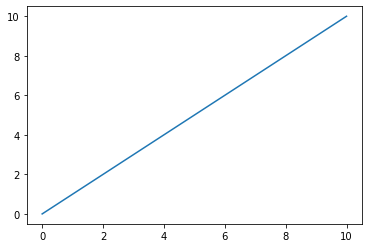

In [18]:
plt.plot(x,y)
plt.show()

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


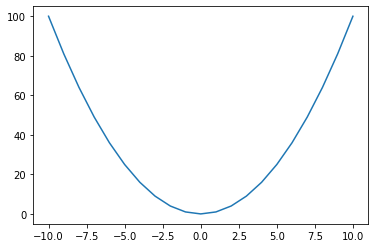

In [20]:
f=lambda x:x**2

x=[x for x in range(-10,11)]
y=[f(y) for y in range(-10,11)]

print(x)
print(y)

plt.plot(x,y)
plt.show()

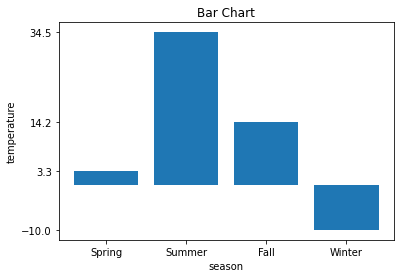

In [26]:
x=list(range(4))
temperatures=[3.3, 34.5, 14.2, -10]
plt.title('Bar Chart')
plt.bar(x, temperatures)
plt.xticks(x, seasons)
plt.yticks(sorted(temperatures))
plt.xlabel('season')
plt.ylabel('temperature')
plt.show()

---

# 3. 토크나이징
## 3.2.1 Kkma

In [2]:
from konlpy.tag import Kkma

In [3]:
kkma=Kkma()

text="아버지가 방에 들어갑니다."
morphs=kkma.morphs(text)
morphs

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']

In [5]:
pos=kkma.pos(text)
pos

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

In [6]:
nouns=kkma.nouns(text)
nouns

['아버지', '방']

In [7]:
sentences='오늘 날씨는 어때요? 내일은 덥다던데.'
s=kkma.sentences(sentences)
s

['오늘 날씨는 어 때요?', '내일은 덥다 던데.']

## 3.2.2 Komoran

In [8]:
from konlpy.tag import Komoran

In [9]:
komoran=Komoran()

morphs=komoran.morphs(text)
morphs

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']

In [10]:
pos=komoran.pos(text)
pos

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('ㅂ니다', 'EF'),
 ('.', 'SF')]

In [11]:
nouns=komoran.nouns(text)
nouns

['아버지', '방']

## 3.2.3 Okt

In [12]:
from konlpy.tag import Okt

In [13]:
okt=Okt()

morphs=okt.morphs(text)
morphs

['아버지', '가', '방', '에', '들어갑니다', '.']

In [14]:
pos=okt.pos(text)
pos

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어갑니다', 'Verb'),
 ('.', 'Punctuation')]

In [15]:
nouns=okt.nouns(text)
nouns

['아버지', '방']

In [17]:
text="오늘 날씨가 좋아욬ㅋㅋ"
okt.normalize(text)

'오늘 날씨가 좋아요ㅋㅋ'

In [18]:
okt.phrases(text)

['오늘', '오늘 날씨', '좋아욬', '날씨']

## 3.2.4 사용자 사전 구축

In [19]:
text="우리 챗봇은 엔엘피를 좋아해."
pos=komoran.pos(text)
pos

[('우리', 'NP'),
 ('챗봇은', 'NA'),
 ('엔', 'NNB'),
 ('엘', 'NNP'),
 ('피', 'NNG'),
 ('를', 'JKO'),
 ('좋아하', 'VV'),
 ('아', 'EF'),
 ('.', 'SF')]

In [29]:
komoran=Komoran(userdic='user_dic.tsv')
pos=komoran.pos(text)
pos

[('우리', 'NP'),
 ('챗봇은', 'NA'),
 ('엔엘피', 'NNG'),
 ('를', 'JKO'),
 ('좋아하', 'VV'),
 ('아', 'EF'),
 ('.', 'SF')]